In [9]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [10]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [14]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        # train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
learning_rate = 1e-3
batch_size = 64
epochs = 5 # кол-во эпох

In [16]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.301599  [   64/60000]
loss: 2.293866  [ 6464/60000]
loss: 2.270173  [12864/60000]
loss: 2.270338  [19264/60000]
loss: 2.256694  [25664/60000]
loss: 2.225706  [32064/60000]
loss: 2.236221  [38464/60000]
loss: 2.207696  [44864/60000]
loss: 2.206200  [51264/60000]
loss: 2.172205  [57664/60000]
Test Error: 
 Accuracy: 43.3%, Avg loss: 2.167081 

Epoch 2
-------------------------------
loss: 2.173779  [   64/60000]
loss: 2.163243  [ 6464/60000]
loss: 2.109787  [12864/60000]
loss: 2.132973  [19264/60000]
loss: 2.078455  [25664/60000]
loss: 2.020423  [32064/60000]
loss: 2.051550  [38464/60000]
loss: 1.981237  [44864/60000]
loss: 1.990500  [51264/60000]
loss: 1.917197  [57664/60000]
Test Error: 
 Accuracy: 55.9%, Avg loss: 1.914410 

Epoch 3
-------------------------------
loss: 1.944784  [   64/60000]
loss: 1.908495  [ 6464/60000]
loss: 1.800827  [12864/60000]
loss: 1.849063  [19264/60000]
loss: 1.724949  [25664/60000]
loss: 1.682676  [32064/600

In [17]:
print(test_loss_sgd)

[2.167081308972304, 1.9144097695684736, 1.5485132363191836, 1.2689828067828135, 1.0958398060434182]


In [18]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.290478  [   64/60000]
loss: 0.586717  [ 6464/60000]
loss: 0.457729  [12864/60000]
loss: 0.483892  [19264/60000]
loss: 0.470376  [25664/60000]
loss: 0.423300  [32064/60000]
loss: 0.386059  [38464/60000]
loss: 0.531915  [44864/60000]
loss: 0.501799  [51264/60000]
loss: 0.399834  [57664/60000]
Test Error: 
 Accuracy: 82.4%, Avg loss: 0.475774 

Epoch 2
-------------------------------
loss: 0.274494  [   64/60000]
loss: 0.340188  [ 6464/60000]
loss: 0.295929  [12864/60000]
loss: 0.344721  [19264/60000]
loss: 0.349651  [25664/60000]
loss: 0.394884  [32064/60000]
loss: 0.306270  [38464/60000]
loss: 0.475152  [44864/60000]
loss: 0.419951  [51264/60000]
loss: 0.382628  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.434684 

Epoch 3
-------------------------------
loss: 0.202159  [   64/60000]
loss: 0.356709  [ 6464/60000]
loss: 0.231801  [12864/60000]
loss: 0.323568  [19264/60000]
loss: 0.358376  [25664/60000]
loss: 0.405079  [32064/600

In [19]:
test_loss_rms

[0.47577429947200095,
 0.43468429546826964,
 0.41111431323039305,
 0.43126281346105466,
 0.432884903517878]

In [20]:
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.308137  [   64/60000]
loss: 2.296075  [ 6464/60000]
loss: 2.270660  [12864/60000]
loss: 2.268562  [19264/60000]
loss: 2.260096  [25664/60000]
loss: 2.235425  [32064/60000]
loss: 2.239796  [38464/60000]
loss: 2.208950  [44864/60000]
loss: 2.202252  [51264/60000]
loss: 2.170995  [57664/60000]
Test Error: 
 Accuracy: 44.5%, Avg loss: 2.168177 

Epoch 2
-------------------------------
loss: 2.181169  [   64/60000]
loss: 2.167002  [ 6464/60000]
loss: 2.105766  [12864/60000]
loss: 2.125280  [19264/60000]
loss: 2.084334  [25664/60000]
loss: 2.032907  [32064/60000]
loss: 2.058284  [38464/60000]
loss: 1.979779  [44864/60000]
loss: 1.979308  [51264/60000]
loss: 1.910292  [57664/60000]
Test Error: 
 Accuracy: 54.6%, Avg loss: 1.907592 

Epoch 3
-------------------------------
loss: 1.944020  [   64/60000]
loss: 1.906963  [ 6464/60000]
loss: 1.785297  [12864/60000]
loss: 1.831917  [19264/60000]
loss: 1.737054  [25664/60000]
loss: 1.684591  [32064/600

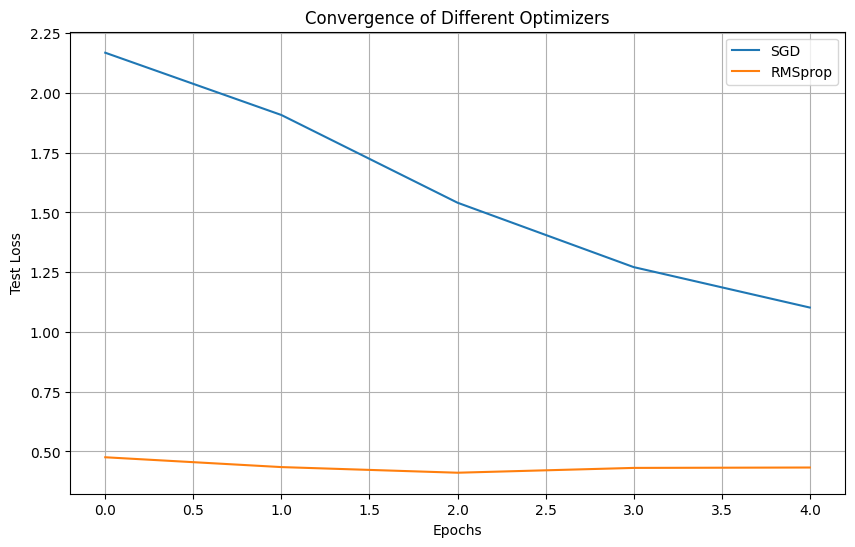

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_loss_sgd, label='SGD')
plt.plot(test_loss_rms, label='RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Convergence of Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

# Вывод
# 50 эпох много, занимает большое кол-во времени, реализация с 5 эпохами
# RMSProp показывает меньшие потери по сравнению с SGD